# Importing libraries

In [45]:
import pandas as pd
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [48]:
# Load the dataset
transactions = pd.read_csv(r'C:\Users\vaish\Downloads\archive\Groceries_dataset.csv')
transactions.head()


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


# Data Info

In [51]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [54]:
transactions.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [53]:
transactions.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

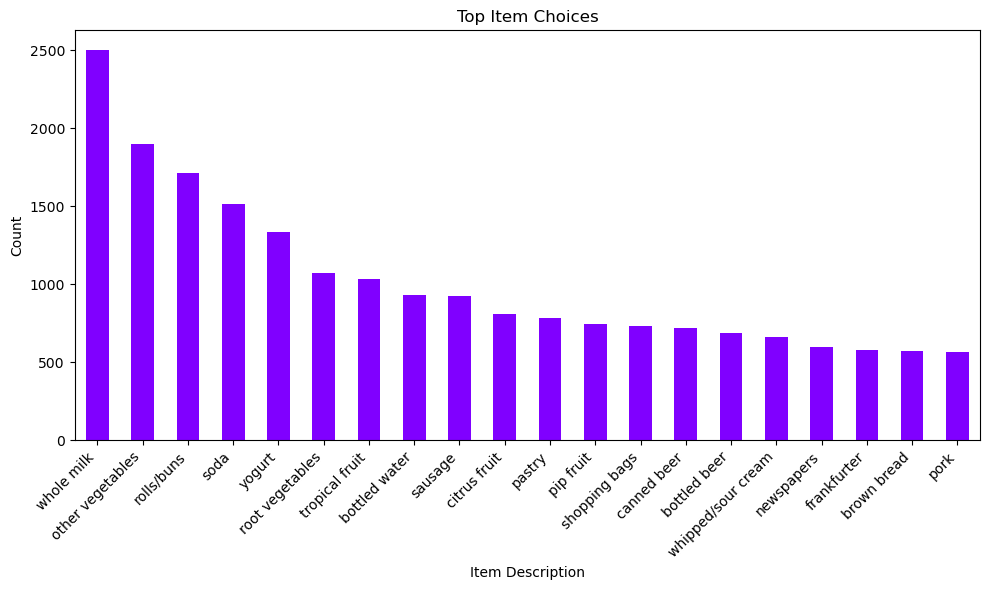

In [50]:
# Top item choices
top_items = transactions['itemDescription'].value_counts().nlargest(20)
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', colormap='rainbow')
plt.title('Top Item Choices')
plt.xlabel('Item Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Transforming data for Apriori Algorithm

In [55]:
# Group the transactions by Member_number and concatenate the itemDescription values
basket_data = (transactions.groupby('Member_number')['itemDescription']
                .apply(lambda x: list(x))
                .reset_index()
                .rename(columns={'itemDescription': 'items'}))

# Convert the list of items into a sparse matrix format
te = TransactionEncoder()
te_ary = te.fit(basket_data['items']).transform(basket_data['items'])
basket_df = pd.DataFrame(te_ary, columns=te.columns_)
basket_df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [56]:
basket_df.describe()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
count,3898,3898,3898,3898,3898,3898,3898,3898,3898,3898,...,3898,3898,3898,3898,3898,3898,3898,3898,3898,3898
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,3838,3592,3876,3869,3895,3894,3777,3881,3432,3587,...,3820,3848,3629,3295,3890,3552,3726,2112,2795,3838


# Run Apriori Algorithm

In [57]:
# Load the transformed basket data

# Run the Apriori algorithm
frequent_itemsets = apriori(basket_df, min_support=0.01, use_colnames=True)

# Print the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Print the association rules
print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
       support                                           itemsets
0     0.015393                            (Instant food products)
1     0.078502                                         (UHT-milk)
2     0.031042                                    (baking powder)
3     0.119548                                             (beef)
4     0.079785                                          (berries)
...        ...                                                ...
3011  0.011031     (whole milk, whipped/sour cream, yogurt, soda)
3012  0.010518  (yogurt, bottled water, rolls/buns, whole milk...
3013  0.013597  (yogurt, sausage, rolls/buns, whole milk, othe...
3014  0.010005  (yogurt, shopping bags, rolls/buns, whole milk...
3015  0.013597  (yogurt, soda, rolls/buns, whole milk, other v...

[3016 rows x 2 columns]

Association Rules:
                                           antecedents         consequents  \
0                                             (liquor)        (who

In [58]:
rule_df = pd.DataFrame(rules)

In [59]:
rule_df.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(liquor),(whole milk),0.026424,0.458184,0.016675,0.631068,1.377325,0.004568,1.468607,0.281390
1,(mustard),(whole milk),0.023345,0.458184,0.014110,0.604396,1.319112,0.003413,1.369591,0.247697
2,"(sausage, UHT-milk)",(other vegetables),0.018471,0.376603,0.011801,0.638889,1.696450,0.004845,1.726329,0.418260
3,"(yogurt, UHT-milk)",(other vegetables),0.023345,0.376603,0.014366,0.615385,1.634039,0.005574,1.620831,0.397294
4,"(beef, bottled beer)",(whole milk),0.020780,0.458184,0.013084,0.629630,1.374186,0.003563,1.462904,0.278075


# Result Visualization

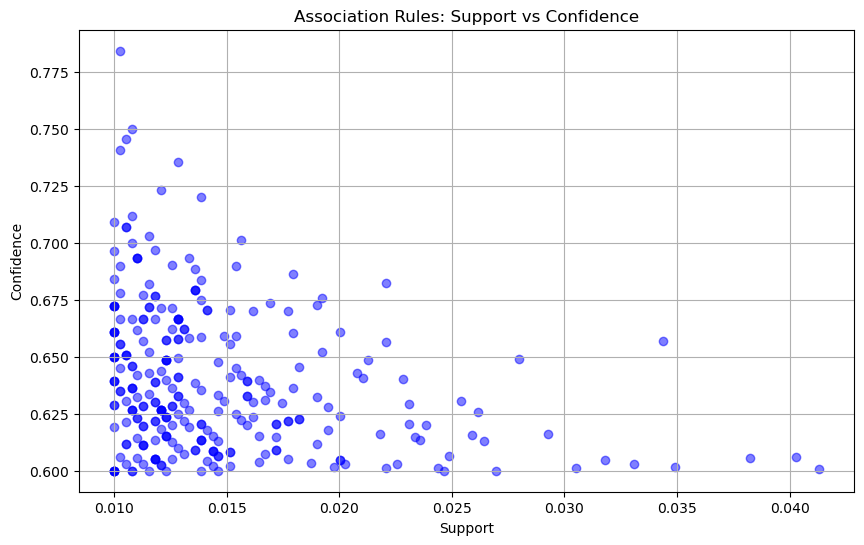

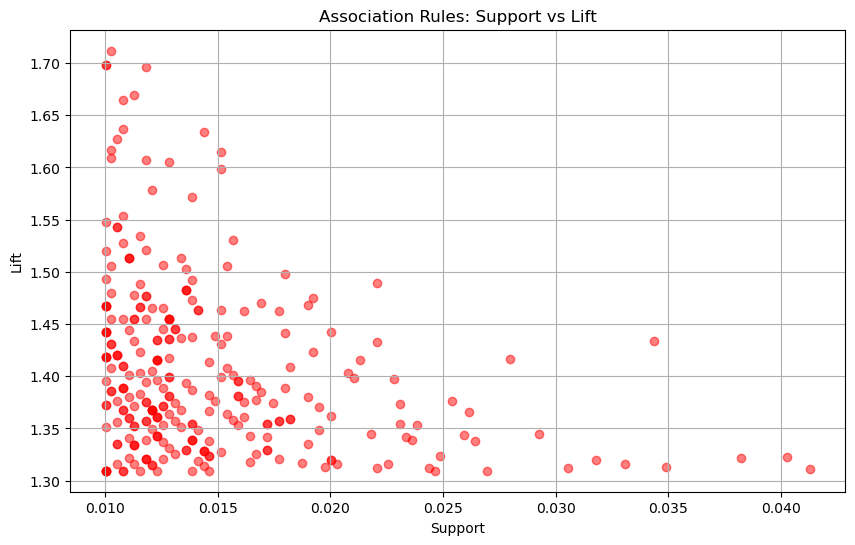

In [60]:
# Plot support vs confidence
plt.figure(figsize=(10, 6))
plt.scatter(rule_df['support'], rule_df['confidence'], marker='o', c='blue', alpha=0.5)
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

# Plot support vs lift
plt.figure(figsize=(10, 6))
plt.scatter(rule_df['support'], rule_df['lift'], marker='o', c='red', alpha=0.5)
plt.title('Association Rules: Support vs Lift')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.grid(True)
plt.show()